<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/Medical_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data preprocessing
Dataset link: https://www.kaggle.com/datasets/d3lhomi10/medical-cost-personal-dataset

## Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset = pd.read_csv('/content/insurance.csv')

## Data exploration

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

3

In [ ]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

In [ ]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by 'sex', 'smoker', 'region'

In [ ]:
# initially, without the argument contained within the mean() function, the line was resulting into an error ,
#taking into account the non-numerical values of object-type columns

dataset.groupby('sex').mean(numeric_only=True)

,age,bmi,children,smoker,charges
sex,,,,,
female,39.503021,30.377749,1.074018,0.173716,12569.578844
male,38.917160,30.943129,1.115385,0.235207,13956.751178


In [ ]:
dataset.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
0,39.385338,30.651795,1.090226,8434.268298
1,38.514599,30.708449,1.113139,32050.231832


In [ ]:
dataset.groupby('region').mean(numeric_only=True)

,age,bmi,children,smoker,charges
region,,,,,
northeast,39.268519,29.173503,1.046296,0.206790,13406.384516
northwest,39.196923,29.199785,1.147692,0.178462,12417.575374
southeast,38.939560,33.355989,1.049451,0.250000,14735.411438
southwest,39.455385,30.596615,1.141538,0.178462,12346.937377


## Dealing with missing values

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isnull().values.sum()

0

## Encoding the categorical data


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'region'], dtype='object')

In [ ]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dataset['smoker'].unique()

array([1, 0])

In [ ]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [ ]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True) # dropping the first column to avoid the overfitting

In [ ]:
dataset.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False


In [ ]:
dataset.shape

(1338, 9)

## Correlation matrix

In [ ]:
dataset_2 = dataset.drop(columns = 'charges')

<Axes: title={'center': 'Correlation with Charges'}>

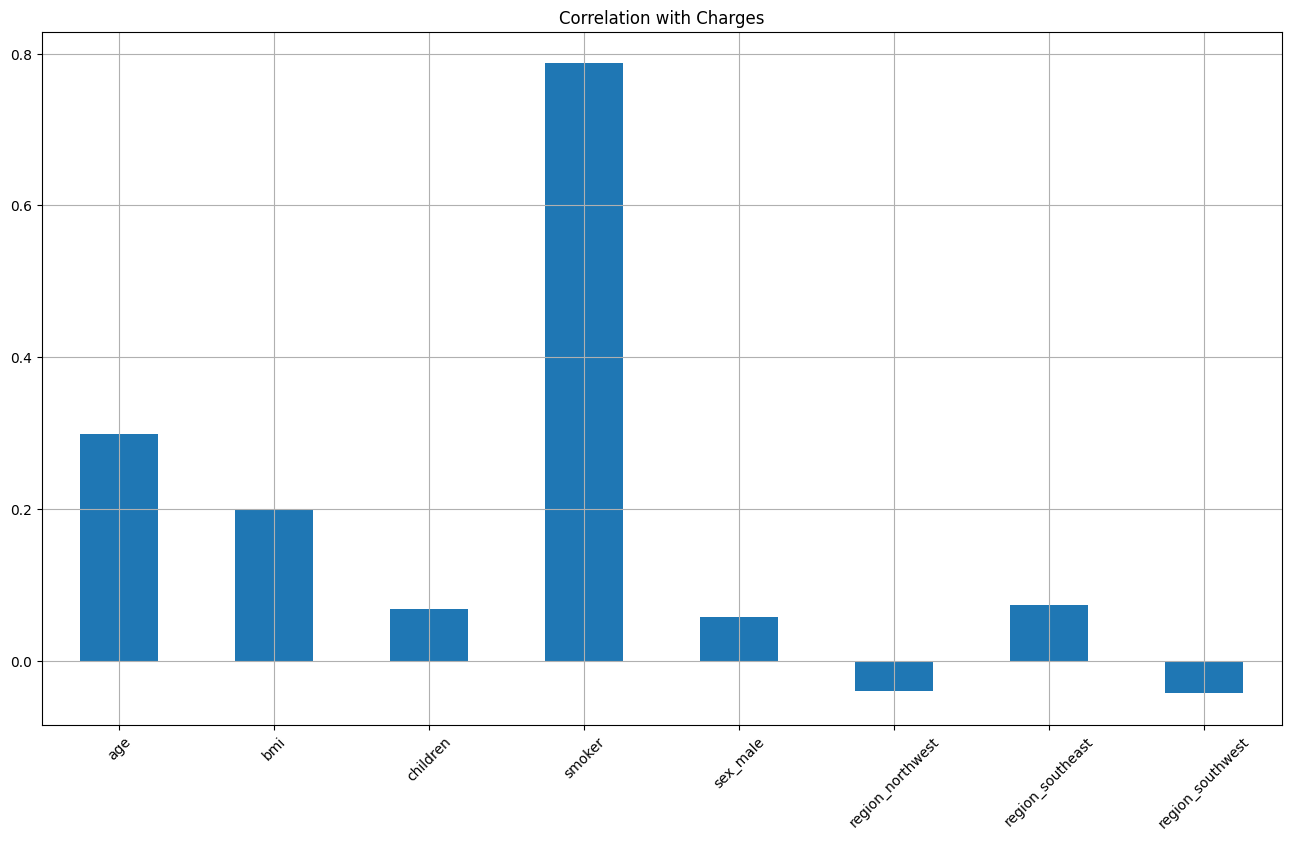

In [ ]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Correlation with Charges', rot=45, grid=True
)

In [ ]:
corr = dataset.corr()

<Axes: >

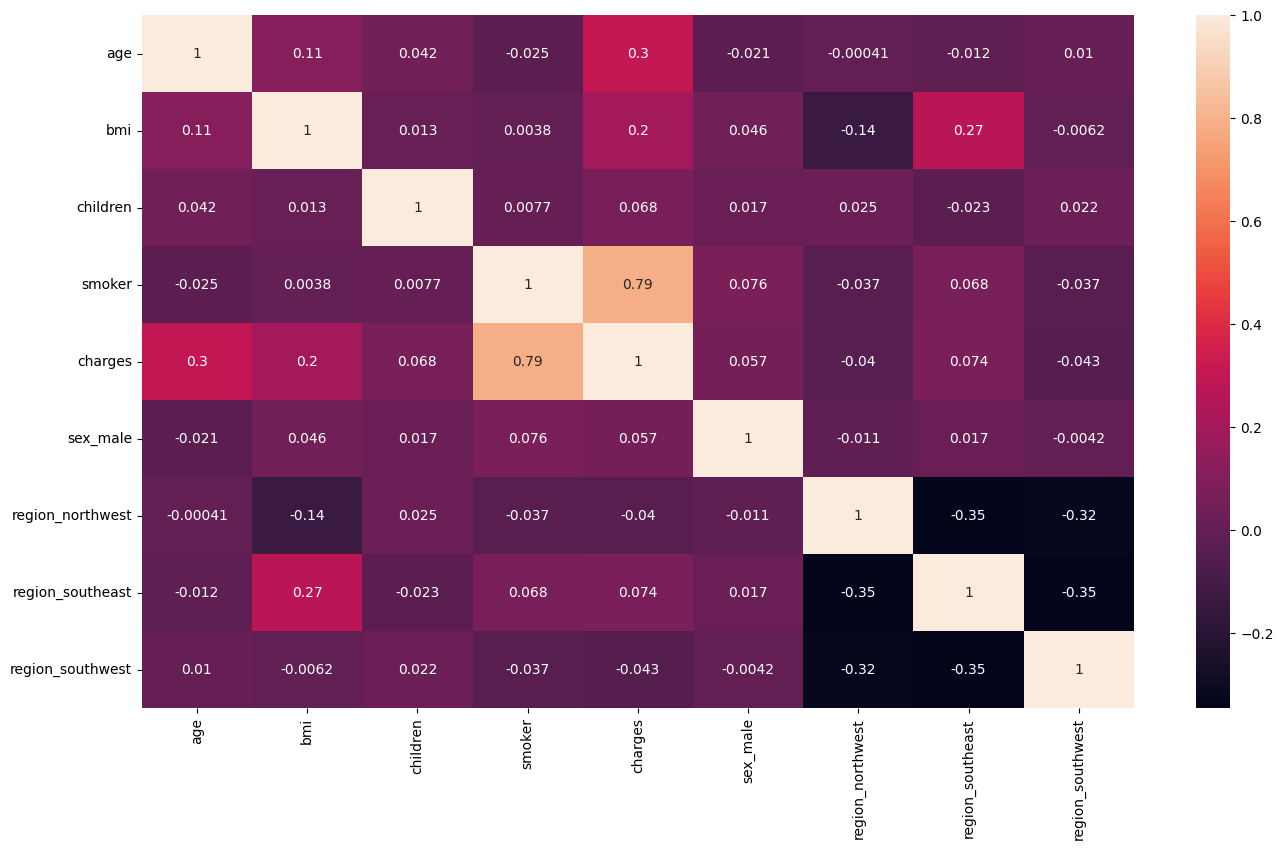

In [ ]:
# heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot = True)

In [ ]:
## Splitting the dataset
dataset.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False


In [ ]:
# matrix of features / independent variables
x = dataset.drop(columns='charges')

In [ ]:
# target / dependent variable
y = dataset['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape


(1070, 8)

In [ ]:
y_train.shape

(1070,)

In [ ]:
x_test.shape

(268, 8)

In [ ]:
y_test.shape

(268,)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train - sc.fit_transform(x_train)
x_test - sc.transform(x_test)

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
578,51.083316,30.285396,1.065659,0.507291,-0.015067,0.557920,0.615521,-0.708629
610,46.438388,29.589622,1.065659,0.507291,0.985157,0.557920,-0.624640,0.585264
569,47.367374,38.974187,1.239124,-0.971255,-0.015067,-0.792372,0.615521,0.585264
1034,59.444186,37.142541,0.892195,0.507291,-0.015067,-0.792372,0.615521,0.585264
198,50.154331,20.100273,0.892195,0.507291,0.985157,-0.792372,0.615521,0.585264
...,...,...,...,...,...,...,...,...
1084,60.373171,30.532689,1.239124,0.507291,0.985157,-0.792372,0.615521,0.585264
726,40.864475,28.780681,1.065659,0.507291,-0.015067,-0.792372,0.615521,0.585264
1132,55.728244,38.735277,0.892195,0.507291,-0.015067,0.557920,0.615521,0.585264
725,30.645634,37.704190,1.412588,-0.971255,0.985157,0.557920,-0.624640,0.585264


In [ ]:
x_train

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
621,37,34.100,4,1,True,False,False,True
194,18,34.430,0,0,True,False,True,False
240,23,36.670,2,1,False,False,False,False
1168,32,35.200,2,0,True,False,False,True
1192,58,32.395,1,0,False,False,False,False
...,...,...,...,...,...,...,...,...
763,27,26.030,0,0,True,False,False,False
835,42,35.970,2,0,True,False,True,False
1216,40,25.080,0,0,True,False,True,False
559,19,35.530,0,0,True,True,False,False


In [ ]:
x_test

,age,bmi,children,smoker,sex_male,region_northwest,region_southeast,region_southwest
578,52,30.200,1,0,True,False,False,True
610,47,29.370,1,0,False,False,True,False
569,48,40.565,2,1,True,True,False,False
1034,61,38.380,0,0,True,True,False,False
198,51,18.050,0,0,False,True,False,False
...,...,...,...,...,...,...,...,...
1084,62,30.495,2,0,False,True,False,False
726,41,28.405,1,0,True,True,False,False
1132,57,40.280,0,0,True,False,False,False
725,30,39.050,3,1,False,False,True,False


# Part 2: Building the model

## 1)Multiplea linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor_lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999876970680434

## 2)Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = regressor_rf.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8797611669262795

In [97]:

!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


## 3) XGBoost regression

In [101]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train) # issues with '__sklearn_tags__', but it seems to be functionning . For now, I don't have a way to measure the accuracy of the results

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRFRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [102]:
y_pred = regressor_xgb.predict(x_test)

In [103]:
r2_score(y_test, y_pred)

0.8999353063827985

# Part 3: Predict charges for a new customer

## Example 1

Name : Frank, age: 40m sex : 1, bmi :45.50, children :4, smoker:1, region:northeast

In [104]:
dataset.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False


In [109]:
frank_obs = [[40, 45.5, 4, 1, 1, 0, 0, 0]]


In [110]:
regressor_xgb.predict(sc.transform(frank_obs))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([14381.424], dtype=float32)

## Example 2

Name : Sara, age:19,bmi :27.9, children :0, smoker:0, region:northwest

In [113]:
sara_obs = [[19, 27.9, 0 , 0, 0, 1, 0, 0]]

In [114]:
dataset.head()

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False


In [112]:
regressor_xgb.predict(sc.transform(sara_obs)) # the charges predicted for Sara

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2204.187], dtype=float32)